# Scraping data from Skytrax

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | The flight scheduled at 1840 l...
1,✅ Trip Verified | I have been flying BA for ...
2,✅ Trip Verified | On arriving at Mexico Airp...
3,✅ Trip Verified | I have flown British Airwa...
4,Not Verified | We bought tickets for a Geneva-...


In [4]:
df.to_csv("BA_reviews.csv")

In [5]:
# Display initial data to understand its structure
print(df.head())

                                             reviews
0  Not Verified |  The flight scheduled at 1840 l...
1  ✅ Trip Verified |   I have been flying BA for ...
2  ✅ Trip Verified |   On arriving at Mexico Airp...
3  ✅ Trip Verified |   I have flown British Airwa...
4  Not Verified | We bought tickets for a Geneva-...


# Task 1

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [7]:
# Data Cleaning
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

In [8]:
# Apply cleaning function
df['cleaned_review'] = df['reviews'].apply(clean_text)  


# Topic Modeling using LDA

In [9]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_review'])
lda = LatentDirichletAllocation(n_components=10, random_state=42) 
lda.fit(dtm)

# Display topics and keywords
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic #1:
['flight', 'passengers', 'london', 'airways', 'british', 'luggage', 'crew', 'service', 'trip', 'ba']
Topic #2:
['staff', 'british', 'business', 'trip', 'class', 'seats', 'service', 'seat', 'flight', 'ba']
Topic #3:
['business', 'cabin', 'class', 'service', 'crew', 'food', 'trip', 'good', 'ba', 'flight']
Topic #4:
['told', 'service', 'london', 'airport', 'trip', 'ba', 'airways', 'hours', 'british', 'flight']
Topic #5:
['london', 'way', 'flights', 'customer', 'email', 'service', 'staff', 'trip', 'ba', 'flight']
Topic #6:
['service', 'booked', 'voucher', 'new', 'trip', 'refund', 'ba', 'told', 'cancelled', 'flight']
Topic #7:
['time', 'sent', 'hour', 'service', 'airport', 'cancelled', 'staff', 'trip', 'flight', 'ba']
Topic #8:
['food', 'return', 'flights', 'arrived', 'late', 'great', 'london', 'trip', 'ba', 'flight']
Topic #9:
['service', 'booked', 'crew', 'customer', 'flights', 'airline', 'time', 'flight', 'trip', 'ba']
Topic #10:
['experience', 'plane', 'trip', 'good', 'gate', 

C:\Users\bhumi\AppData\Local\Temp\ipykernel_34272\106071748.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(word_freq_df))  # You can choose a different colormap


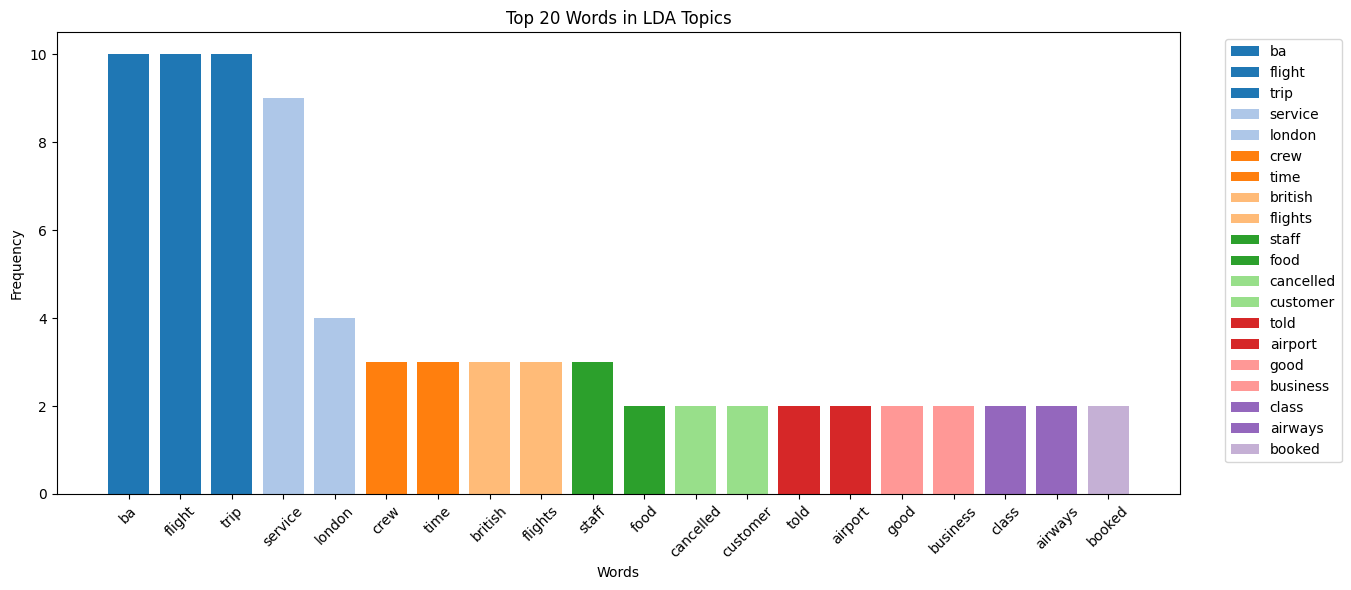

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Extract the top words for each topic
num_top_words = 10  # Change this to display more/less words
topic_words = {}

for index, topic in enumerate(lda.components_):
    top_word_indices = topic.argsort()[-num_top_words:][::-1]  # Get indices of top words
    top_words = vectorizer.get_feature_names_out()[top_word_indices]  # Get top words
    topic_words[f'Topic {index + 1}'] = top_words

# Step 2: Flatten the topic_words dictionary to count frequencies
word_freq = {}

for words in topic_words.values():
    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

# Convert the dictionary to a DataFrame for easier plotting
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)  # Sort by frequency

# Step 3: Create a frequency chart (Bar Chart) with different colors
plt.figure(figsize=(12, 6))

# Generate a list of colors
colors = plt.cm.get_cmap('tab20', len(word_freq_df))  # You can choose a different colormap

# Plotting each bar with a different color
for i, (word, freq) in enumerate(zip(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20])):
    plt.bar(word, freq, color=colors(i), label=word)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in LDA Topics')
plt.xticks(rotation=45)
plt.tight_layout()

# Optionally, you can add a legend if desired
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

plt.show()


# Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


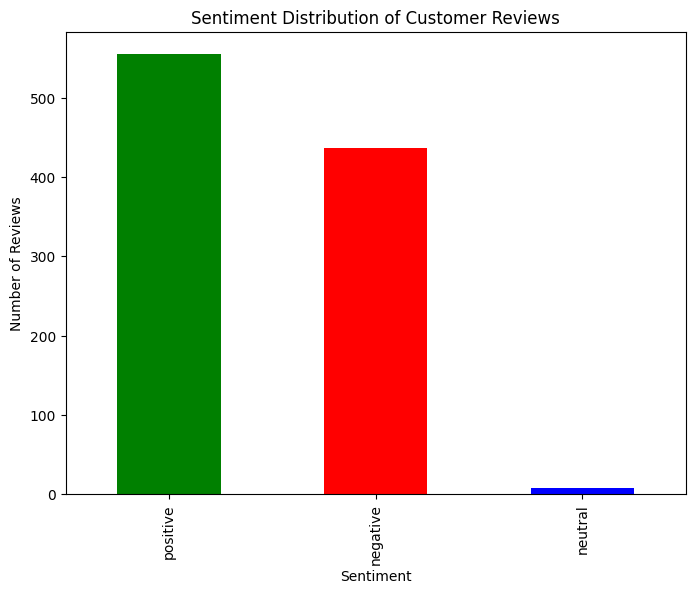

In [31]:
# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Visualizing Sentiment Distribution
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution of Customer Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# Generating Word Cloud

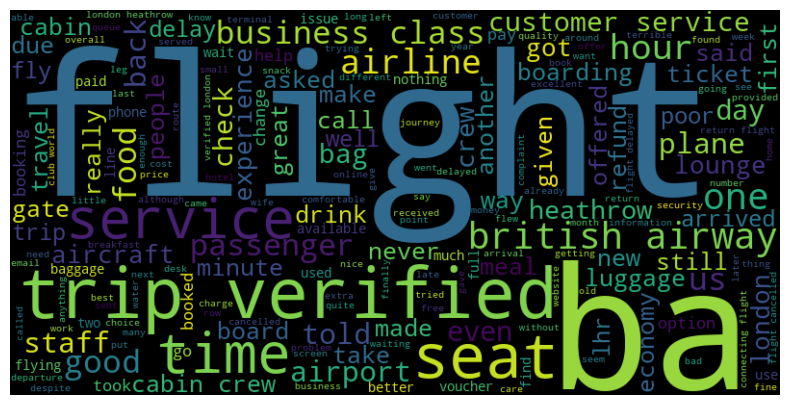

In [32]:
# Generate Word Cloud
all_text = ' '.join(df['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Task 2